In [ ]:
!pip install basc-py4chan
import basc_py4chan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
!pip install -q transformers
!pip install basc-py4chan
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def getThread(board,threadid):
  b = basc_py4chan.Board(board)
  thread = b.get_thread(threadid)
  return thread

def getThreads(board,allPages=False):
  b = basc_py4chan.Board(board)
  if allPages:
    return b.get_all_threads()
  return b.get_threads(page=1)

def printTopicLine(thread):
  print(thread.topic.text_comment.split("\n")[0])

def processSentiment(s):
    if s['label'] == "NEGATIVE":
      return round(100-s['score']*100)
    return round(s['score']*100)

def generateSentHistForThread(thread,nbins=4):
  a = [processSentiment(sentiment_pipeline([p.text_comment])[0])
     for p in thread.replies]
  fig, ax = plt.subplots(figsize =(10, 7))
  ax.hist(a, bins = [100/nbins*i for i in range(nbins+1)])
  plt.show()

def displayThreadInfo(board,id,nbins=4):
  thread = getThread(board,id)
  printTopicLine(thread)
  generateSentHistForThread(thread,nbins=nbins)

>Ye (formerly known as Kanye West)


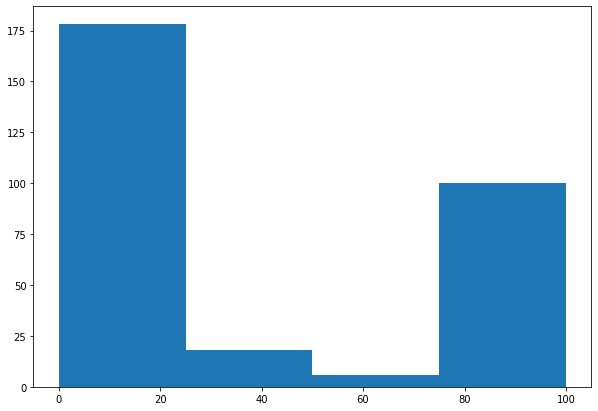

In [ ]:
displayThreadInfo('pol',406458162)

How is Milo making a comeback, isn't he a pedophile?


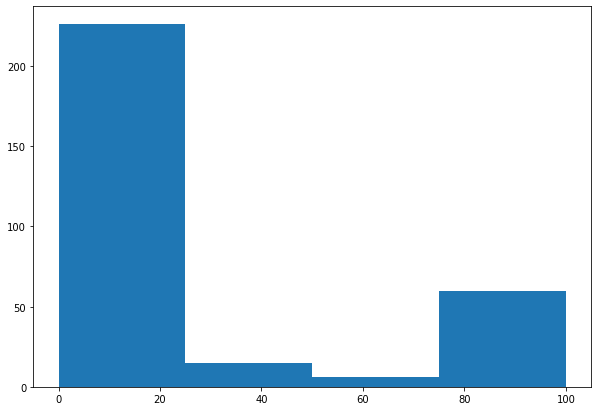

In [ ]:
displayThreadInfo('pol',406433807)

PRESIDENT DONALD J TRUMP @POTUS45


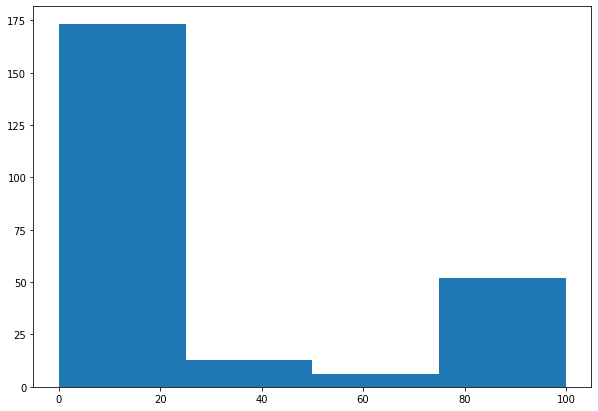

In [ ]:
displayThreadInfo('pol',406543237)

>you'll never take my gu-ACK


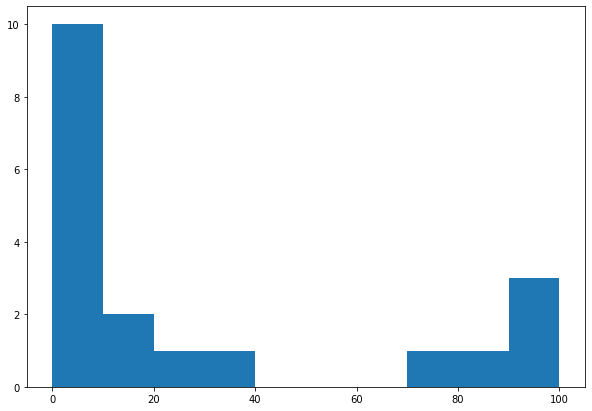

get it whites ?


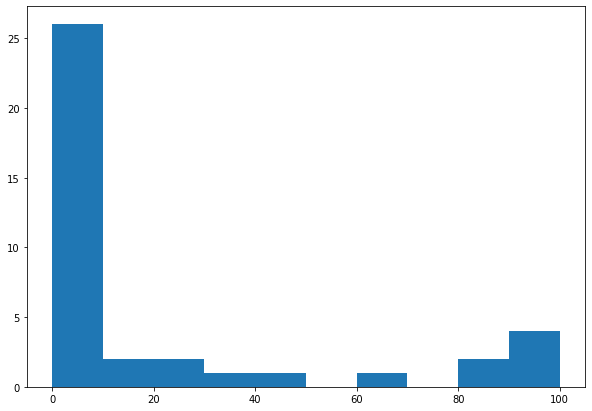

IMMINENT CIVIL WAR IN CANADA


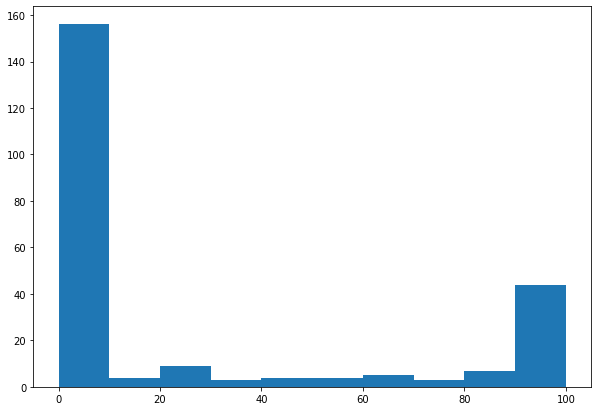

Do they have the balls to actually do it?


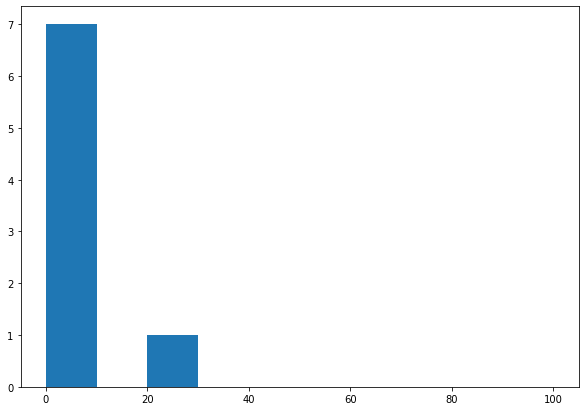

Been trying to find a labourer for a small carpentry subcontracting crew. Every kid under 25 seems to be incompetent.. Lots of them seem to live their entire lives on Discord servers and what not.


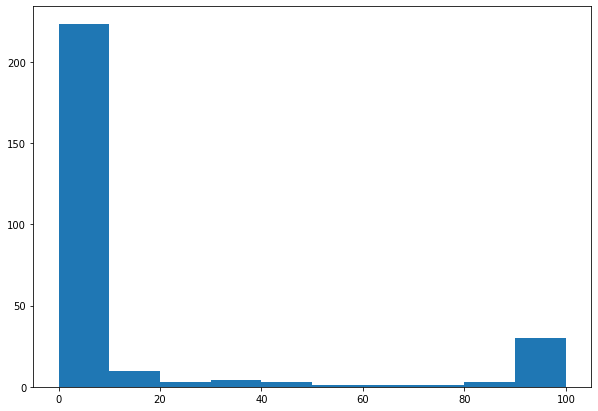

New toss


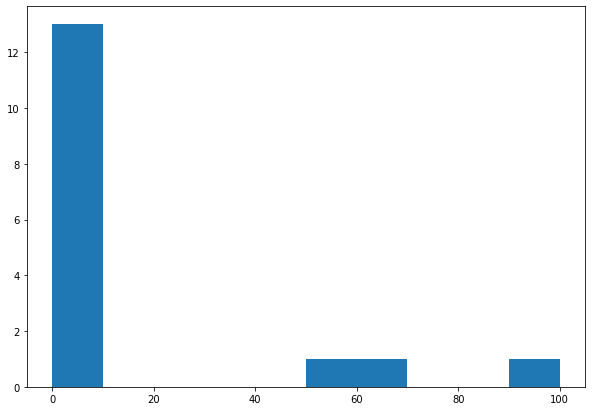

What the FUCK happened to Lake Mead?


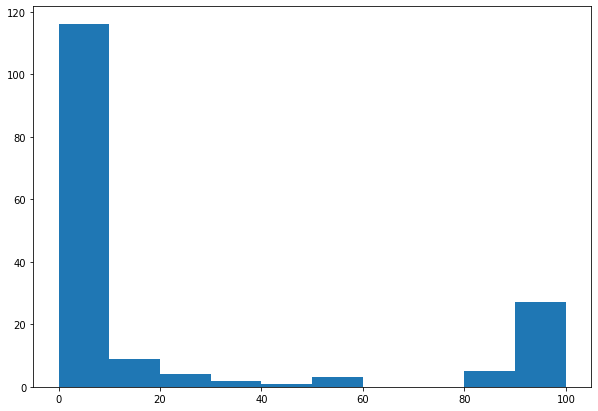

This weird american gay freak politician was arrested for stealing somebody's suitcase at an airport. What even are americans anymore?


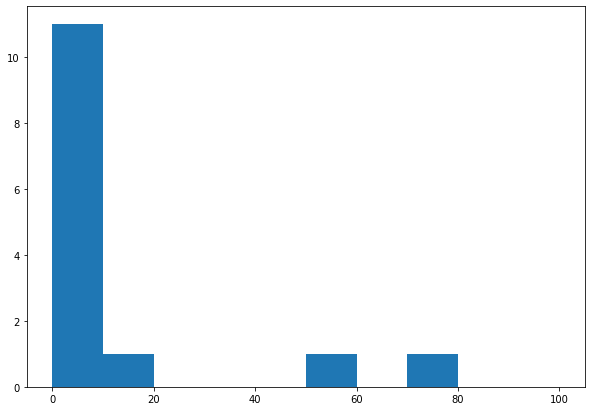

Why is he advertising pedo Balenciaga with Ye 2024 on it?


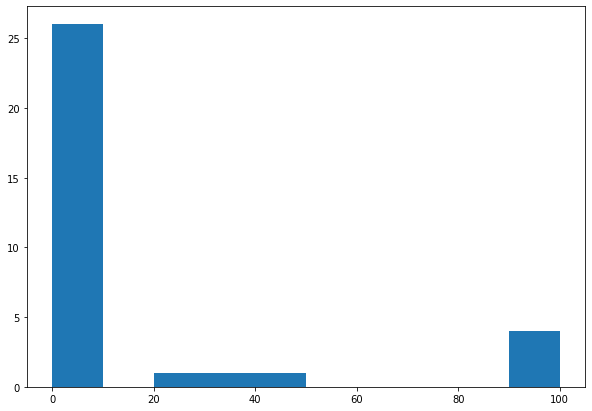

How exactly is it possible for this to happen in the "most efficient system of all time"


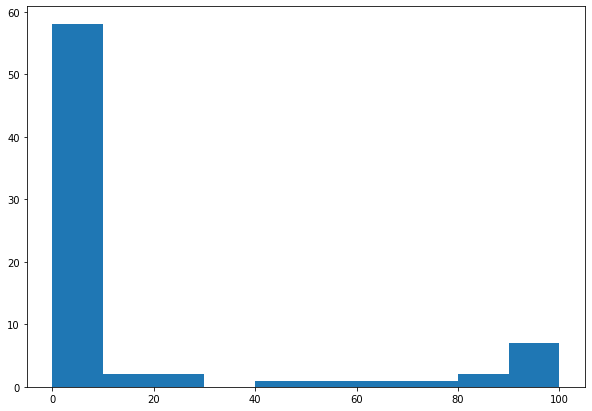

Who or what was mimicing humans during our evolution that created the ability to spot the Uncanny Valley down to such precise levels that even with modern technology it is extremely hard to fool a person with a mimic?


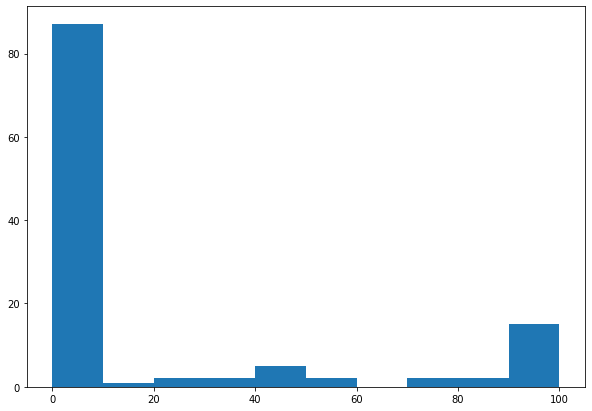

>a well regulated militia


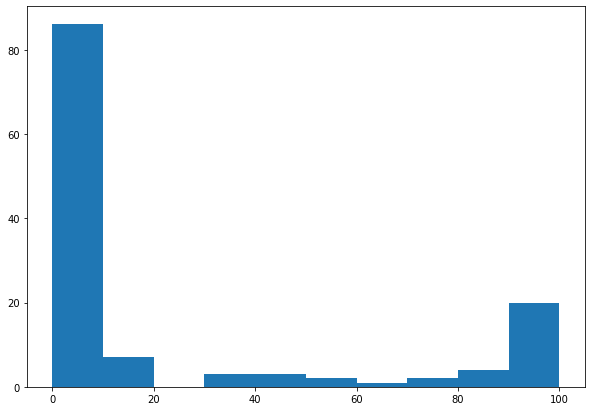

Are mexicans even human?


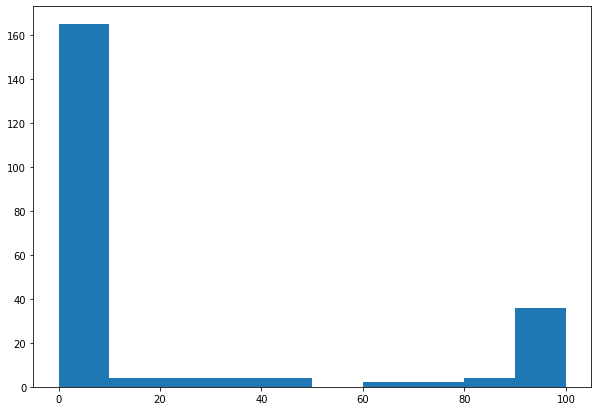

>Ye (formerly known as Kanye West)


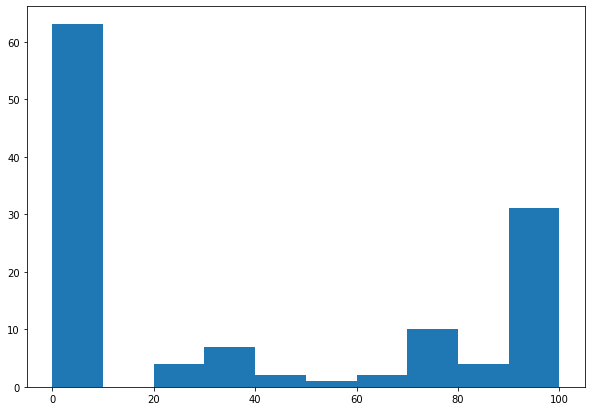

I'm Black and hold a masters in forensic accounting. I likely pay more in taxes than a good chunk of you combined. I also had or no hate or resentment towards white people. I married a black woman, we both vote Republican and are planning on having our second child in the coming months.


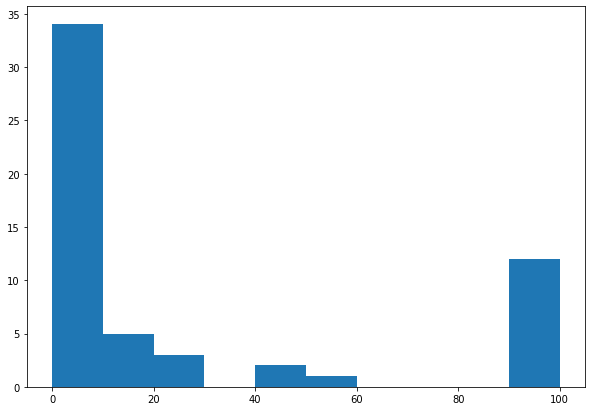

My dream is to move to some traditional place like picrel. 


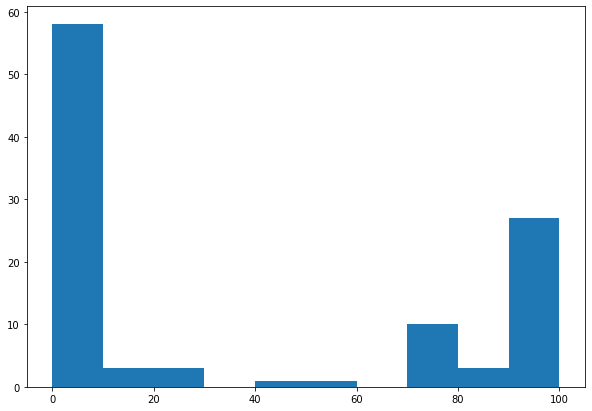

In [ ]:
b = 'pol'
for t in getThreads('pol'):
  if t.replies:
    try:
      displayThreadInfo(b, t.id)
    except:
      pass
      # print('Length exception')

In [ ]:
!pip install textrazor
!pip install htmlentities

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for textrazor: filename=textrazor-1.4.0-py3-none-any.whl size=17021 sha256=125e92491bcc388fb48af0ab3704f385d1c8d6d97553594ecef67cf5f0ef0640
  Stored in directory: /root/.cache/pip/wheels/2e/3e/83/d41e12d797f331eeed32b9a37eae056104c5736209e0cc127c
Successfully built textrazor
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
from spacy import displacy
import re
import htmlentities
from collections import defaultdict

NER = spacy.load("en_core_web_sm")

def convert_html_entities(s):
    matches = re.findall("&#\d+;", s)
    if len(matches) > 0:
        hits = set(matches)
        for hit in hits:
            name = hit[2:-1]
            try:
                entnum = int(name)
                s = s.replace(hit, chr(entnum))
            except ValueError:
                pass

    matches = re.findall("&#[xX][0-9a-fA-F]+;", s)
    if len(matches) > 0:
        hits = set(matches)
        for hit in hits:
            hex = hit[3:-1]
            try:
                entnum = int(hex, 16)
                s = s.replace(hit, chr(entnum))
            except ValueError:
                pass

    matches = re.findall("&\w+;", s)
    hits = set(matches)
    amp = "&amp;"
    if amp in hits:
        hits.remove(amp)
    for hit in hits:
        name = hit[1:-1]
        if name in htmlentities.name2codepoint:
            s = s.replace(hit, chr(htmlentities.name2codepoint[name]))
    s = s.replace(amp, "&")
    return s 

def return_zero():
  return 0

def returnEntitiesFromAllOfThread(thread,termdict=None):
  topic = "" if thread.topic.subject is None else thread.topic.subject
  comment = "" if thread.topic.text_comment is None else thread.topic.text_comment
  replies = [r.text_comment for r in thread.replies if r.text_comment is not None]
  replies = " ".join(replies)
  # print(replies[:10000])
  text=convert_html_entities(topic+" "+comment+" "+replies)
  return returnEntities(text,termdict)


def returnThreadEntities(thread):
  topic = "" if thread.topic.subject is None else thread.topic.subject
  comment = "" if thread.topic.text_comment is None else thread.topic.text_comment
  text=convert_html_entities(topic+" "+comment)
  return returnEntities(text)

def returnEntities(text,termdict=None):
  text1= NER(text)
  if termdict is None:
    termdict = defaultdict(return_zero)
  for word in text1.ents:
    if '.' not in word.text and not word.text.isnumeric() and word.label_ != "CARDINAL" and word.label_ != "ORDINAL":
      termdict[f"{word.text} {word.label_}"]+=1
  termdict = dict(sorted(termdict.items(), key=lambda item: item[1], reverse=True))
  return termdict

def getThreadsSortedByPopularity(board):
  allthreads = getThreads(board,allPages=True)
  allthreads = sorted(allthreads, key=lambda item: item.num_replies, reverse=True)
  return allthreads

def returnEntitiesAcrossBoard(board):
  topThreads = getThreadsSortedByPopularity(board)
  termdict = defaultdict(return_zero)
  for t in topThreads:
    returnEntitiesFromAllOfThread(t,termdict)
  termdict = dict(sorted(termdict.items(), key=lambda item: item[1], reverse=True))
  return termdict

def printTopTermsForBoards(n=5):
  for b in basc_py4chan.get_all_boards():
    print(b.name)
    td = returnEntitiesAcrossBoard(b.name)
    td = dict(sorted(td.items(), key=lambda item: item[1], reverse=True)[:n])
    print(td)

In [ ]:
returnEntitiesAcrossBoard('pol')

{'Jews NORP': 44,
 'Ukraine GPE': 26,
 'Russia GPE': 25,
 'Jewish NORP': 22,
 'US GPE': 19,
 'jewish NORP': 14,
 'Ye PERSON': 14,
 'Trump ORG': 14,
 'America GPE': 14,
 'China GPE': 12,
 'UK GPE': 11,
 'Israel GPE': 11,
 'American NORP': 10,
 'Canada GPE': 10,
 'inb4 ORG': 10,
 'EU ORG': 9,
 'today DATE': 8,
 'Kanye GPE': 8,
 'Ukrainian NORP': 7,
 'Chinese NORP': 7,
 'CCP ORG': 7,
 'German NORP': 7,
 'LOL ORG': 7,
 'Europe LOC': 7,
 'Patriot ORG': 6,
 'Russian NORP': 6,
 'English LANGUAGE': 6,
 'USA GPE': 6,
 'Alberta GPE': 6,
 'Republicans NORP': 6,
 'Hitler PERSON': 6,
 'jews NORP': 6,
 'republicans NORP': 6,
 'NATO ORG': 5,
 'Germany GPE': 5,
 'CNN ORG': 5,
 'Talmud ORG': 5,
 'german NORP': 5,
 'russia GPE': 5,
 'Christianity NORP': 5,
 'Americans NORP': 5,
 'Pro-Russian NORP': 4,
 'Bakhmut ORG': 4,
 'Russians NORP': 4,
 'Finland GPE': 4,
 '90% PERCENT': 4,
 'Biden PERSON': 4,
 'Today DATE': 4,
 'BC ORG': 4,
 'Milo PERSON': 4,
 'French NORP': 4,
 'Twitter PRODUCT': 4,
 'Apple ORG': 

In [ ]:
printTopTermsForBoards(n=5)

3
{'Blender ORG': 38, 'AI ORG': 34, 'Maya PERSON': 16, 'MMD ORG': 12, 'mmd ORG': 10}
a
{'Japanese NORP': 9, 'ITT ORG': 7, 'Naruto GPE': 6, 'Kawaki PERSON': 6, 'Bleach PERSON': 5}
aco
{'AI ORG': 10, 'Bonus WORK_OF_ART': 9, 'Halloween DATE': 5, 'WW ORG': 3, 'tomorrow DATE': 3}
adv
{'years DATE': 12, 'today DATE': 9, 'Canada GPE': 8, 'Christmas DATE': 6, 'WEED PERSON': 5}
an
{'today DATE': 5, 'Earth LOC': 5, '100% PERCENT': 5, 'Australia GPE': 4, 'daily DATE': 4}
b
{'4chan DATE': 5, 'Catholic NORP': 4, 'tonight TIME': 4, 'Robotron ORG': 4, 'Asian NORP': 3}
bant
{'The Holy Spirit WORK_OF_ART': 8, 'Jerusalem GPE': 8, 'today DATE': 6, 'Jesus Christ PERSON': 6, 'Mary PERSON': 4}
biz
{'ICP ORG': 18, 'Cardano PRODUCT': 14, 'today DATE': 12, 'BTC ORG': 12, 'Monero PERSON': 8}
c
{'Ritsu ORG': 13, 'Christmas DATE': 4, 'Gokou Ruri/Kuroneko ORG': 4, 'Kumiko PERSON': 3, 'Pixiv PERSON': 3}
cgl
{'this year DATE': 13, 'UK GPE': 9, 'last year DATE': 9, 'AP ORG': 7, 'next year DATE': 7}
ck
{'Christmas DAT

In [ ]:
displacy.render(text1,style="ent",jupyter=True)